In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


2025/04/09 10:37:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


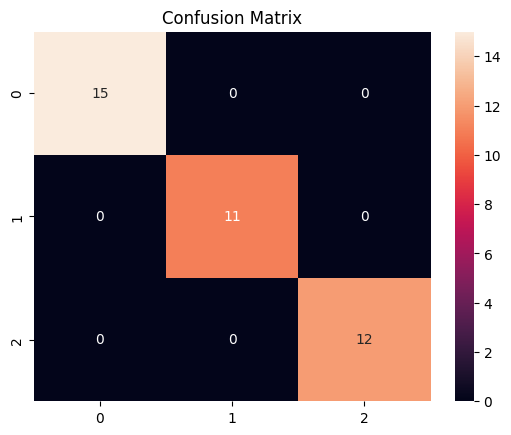

In [6]:
with mlflow.start_run():

    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 3)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)

    # Log confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Log the model
    mlflow.sklearn.log_model(model, "model")


In [ ]:
model_uri = "runs:/<run_id>/model"
loaded_model = mlflow.sklearn.load_model(model_uri)
preds = loaded_model.predict(X_test)
